## Import labriry

In [22]:
# import libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Get the iris dataset

In [3]:
df=pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Creating pd DataFrames

In [4]:
df = pd.DataFrame(df)

## EDA

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.6+ KB


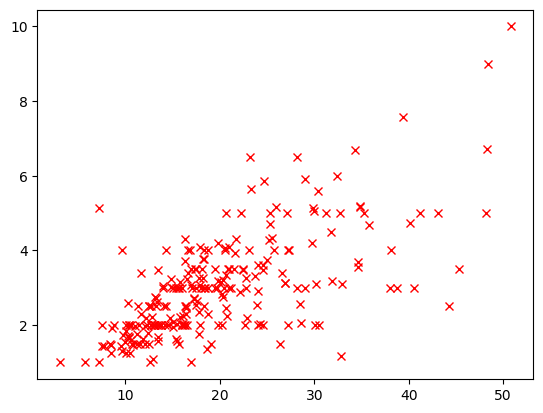

In [8]:
plt.plot(df.total_bill, df.tip,'rx')

 ## Problem framing

In [9]:
# set depandent and independant variable
X = df["total_bill"]
y = df["tip"]

 ## Prepare data for ML model

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

 ## Training linear regression model

In [11]:
linear_regressor = LinearRegression()

In [12]:
X_train = X_train.values.reshape((-1, 1))
y_train = y_train.values.reshape((-1, 1))

In [13]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

 ## Interprete the model

In [14]:
print(linear_regressor.intercept_)

print(linear_regressor.coef_)

[0.78192541]
[[0.11065558]]


 ## Make prediciton

In [15]:
X_test = X_test.values.reshape((-1, 1))

In [16]:
 y_pred = linear_regressor.predict(X_test)

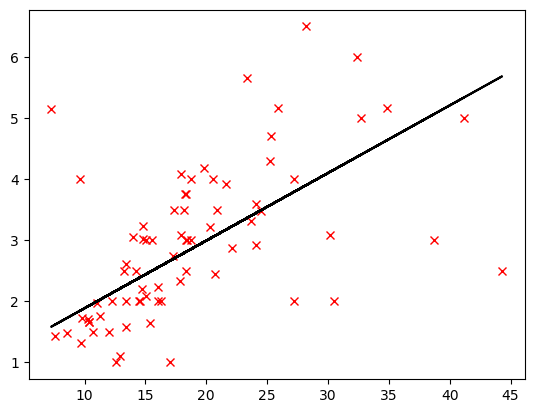

In [17]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

 ## Evaluate the model

In [18]:
metrics.mean_absolute_error(y_test, y_pred)

0.7571876926640516

In [19]:
metrics.mean_squared_error(y_test, y_pred)

1.1084483882773715

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.0528287554381157

In [23]:
 pipeline= Pipeline([
    ("fill_nan_values", SimpleImputer())
])